In [18]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Setup random seed
RANDOM_SEED = 42

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)



cuda


In [20]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.03)


In [21]:
# Turn data into a DataFrame
import pandas as pd

moons = pd.DataFrame({"X1": X[:, 0],
                      "X2": X[:, 1],
                      "label": y})

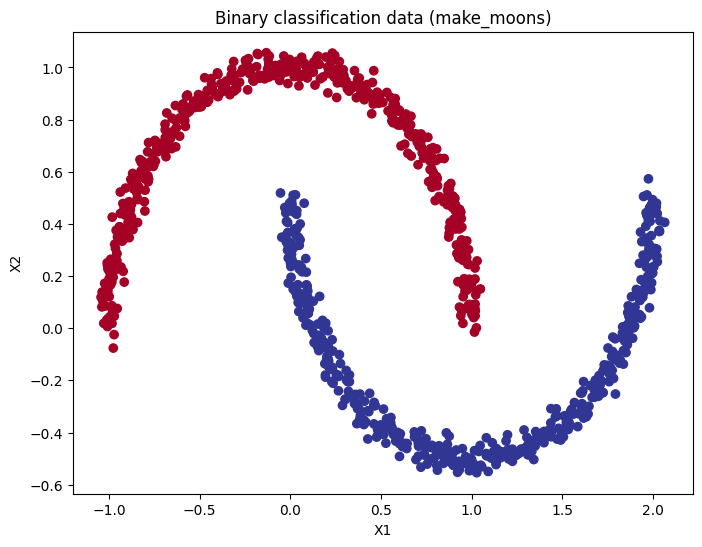

In [22]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Binary classification data (make_moons)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [29]:
# Turn data into tensors of dtype float

# Recreate X and y as numpy arrays before converting to tensors
X, y = make_moons(n_samples=1000, noise=0.03)

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42)

# Move train data to same device as model and test data
X_train = X_train.to(device)
y_train = y_train.to(device)

In [ ]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data

class MoonModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2, 10)
        self.layer_2 = nn.Linear(10, 10)
        self.layer_3 = nn.Linear(10, 1)

    def forward(self, x):
        
        return self.layer_3(self.layer_2(self.layer_1(x)))



# Instantiate the model
## Your code here ##
model_0 = MoonModelV0()


In [38]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_0 = MoonModelV0().to(device)

X_test = X_test.to(device)



In [39]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [40]:
# What's coming out of our model?

# logits (raw outputs of model)

## Your code here ##
y_logits = model_0(X_test.to(device))[:5]
y_logits



# Prediction probabilities

print("Pred probs:")
## Your code here ##

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

# Prediction labels


print("Pred labels:")
## Your code here ##
y_preds = torch.round(y_pred_probs)
y_preds

Pred probs:
Pred labels:


tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [43]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

acc = Accuracy(task="binary").to(device)



In [44]:

# Initialize accuracy metric for binary classification
acc_fn = Accuracy(task="binary").to(device)  # send accuracy function to device
acc_fn

BinaryAccuracy()

In [45]:
# TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_0.train()  # put model in training mode

  # 1. Forward pass (logits output)
  y_logits = model_0(X_train).squeeze()  # raw outputs

  # Turn logits into prediction probabilities
  y_pred_probs = torch.sigmoid(y_logits)

  # Turn prediction probabilities into prediction labels (0 or 1)
  y_preds = torch.round(y_pred_probs)

  # 2. Calculate the loss (compare logits to true labels)
  loss = loss_fn(y_logits, y_train)

  # Calculate the accuracy
  acc = acc_fn(y_preds, y_train.int())

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation)
  loss.backward()

  # 5. Step the optimizer (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()  # put model in evaluation mode
  with torch.inference_mode():
      # 1. Forward pass (to get the logits)
      test_logits = model_0(X_test).squeeze()

      # Turn the test logits into prediction labels
      test_pred_probs = torch.sigmoid(test_logits)
      test_preds = torch.round(test_pred_probs)

      # 2. Calculate the test loss/acc
      test_loss = loss_fn(test_logits, y_test)
      test_acc = acc_fn(test_preds, y_test.int())

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | "
            f"Train Loss: {loss:.4f} | Train Acc: {acc:.4f} | "
            f"Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")


Epoch: 0 | Train Loss: 0.6933 | Train Acc: 0.4450 | Test Loss: 0.6673 | Test Acc: 0.6650
Epoch: 100 | Train Loss: 0.2556 | Train Acc: 0.8775 | Test Loss: 0.2417 | Test Acc: 0.8750
Epoch: 200 | Train Loss: 0.2417 | Train Acc: 0.8863 | Test Loss: 0.2275 | Test Acc: 0.8950
Epoch: 300 | Train Loss: 0.2413 | Train Acc: 0.8863 | Test Loss: 0.2263 | Test Acc: 0.8850
Epoch: 400 | Train Loss: 0.2412 | Train Acc: 0.8875 | Test Loss: 0.2262 | Test Acc: 0.8850
Epoch: 500 | Train Loss: 0.2412 | Train Acc: 0.8875 | Test Loss: 0.2261 | Test Acc: 0.8850
Epoch: 600 | Train Loss: 0.2412 | Train Acc: 0.8875 | Test Loss: 0.2261 | Test Acc: 0.8850
Epoch: 700 | Train Loss: 0.2412 | Train Acc: 0.8875 | Test Loss: 0.2261 | Test Acc: 0.8850
Epoch: 800 | Train Loss: 0.2412 | Train Acc: 0.8875 | Test Loss: 0.2261 | Test Acc: 0.8850
Epoch: 900 | Train Loss: 0.2412 | Train Acc: 0.8875 | Test Loss: 0.2261 | Test Acc: 0.8850


In [46]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

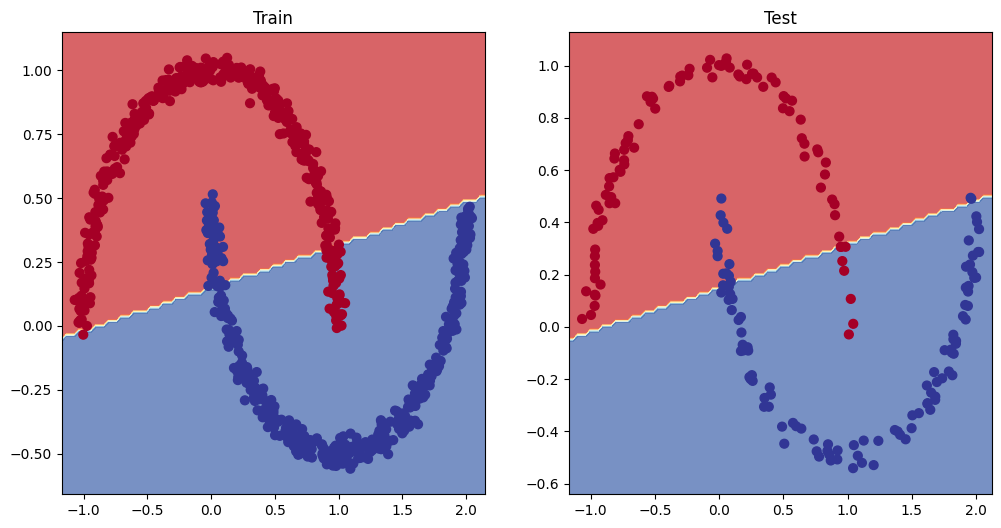

In [47]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))

# Training set
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

# Test set
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

plt.show()


In [48]:
x = torch.linspace(-1, 1, 100).unsqueeze(1)
x[:10]

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182]])

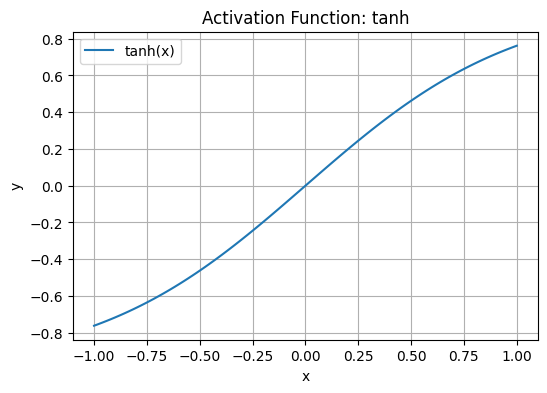

In [49]:
import torch
import matplotlib.pyplot as plt

# Test torch.tanh() on the tensor and plot it
y = torch.tanh(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label="tanh(x)")
plt.title("Activation Function: tanh")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()


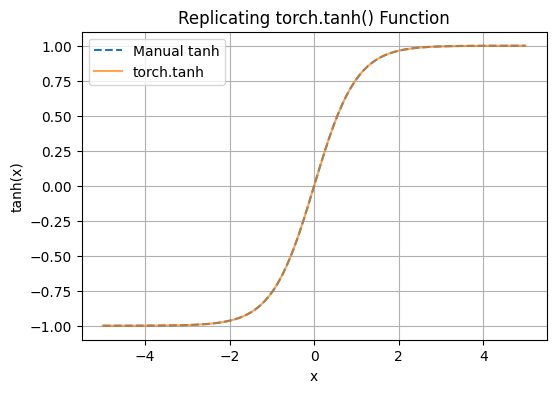

In [50]:
import torch
import matplotlib.pyplot as plt

# Create x values again (if not already defined)
x = torch.linspace(-5, 5, 100)

# Replicate torch.tanh() manually using its mathematical formula
# tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))
y_manual = (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

# Compare with built-in torch.tanh
y_builtin = torch.tanh(x)

# Plot both
plt.figure(figsize=(6, 4))
plt.plot(x, y_manual, label="Manual tanh", linestyle="--")
plt.plot(x, y_builtin, label="torch.tanh", alpha=0.7)
plt.title("Replicating torch.tanh() Function")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.legend()
plt.grid(True)
plt.show()



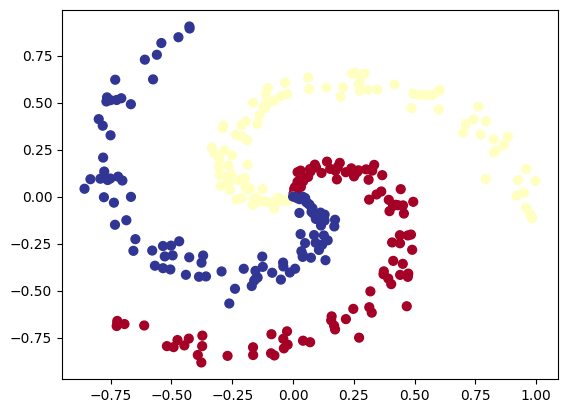

In [51]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [52]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split


In [53]:
import torch
from torch import nn

# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Create model by subclassing nn.Module
class MoonModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_out = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()  # activation function

    def forward(self, x):
        return self.layer_out(
            self.relu(self.layer_2(self.relu(self.layer_1(x))))
        )

# Instantiate model and send it to device
model_0 = MoonModelV0().to(device)
model_0


Using device: cuda


MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_out): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [54]:
# Setup data to be device agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
y_logits = model_0(X_test)[:10]  # raw outputs before activation
print(y_logits)

print("\nPred probs:")
y_pred_probs = torch.sigmoid(y_logits)  # convert logits → probabilities
print(y_pred_probs)

print("\nPred labels:")
y_preds = torch.round(y_pred_probs)  # convert probabilities → 0 or 1
print(y_preds)


Logits:
tensor([[ 0.0006],
        [ 0.0013],
        [ 0.0140],
        [ 0.0185],
        [ 0.0289],
        [ 0.0157],
        [-0.0009],
        [ 0.0260],
        [ 0.0120],
        [ 0.0089]], device='cuda:0', grad_fn=<SliceBackward0>)

Pred probs:
tensor([[0.5001],
        [0.5003],
        [0.5035],
        [0.5046],
        [0.5072],
        [0.5039],
        [0.4998],
        [0.5065],
        [0.5030],
        [0.5022]], device='cuda:0', grad_fn=<SigmoidBackward0>)

Pred labels:
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)


In [55]:
# Setup loss function and optimizer

# Binary classification → Binary Cross Entropy
loss_fn = nn.BCEWithLogitsLoss()  # combines Sigmoid + BCELoss for better stability

# Optimizer → use Stochastic Gradient Descent (SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)


In [56]:
# Build a training loop for the model

# Set random seed (optional for reproducibility)
torch.manual_seed(42)

# Set number of epochs
epochs = 1000

# Move model and data to device
model_0.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  ## ----- Training Phase -----
  model_0.train()  # set model to training mode

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)  # BCEWithLogitsLoss expects raw logits

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()


  ## ----- Testing Phase -----
  model_0.eval()
  with torch.inference_mode():
      # 1. Forward pass on test data
      test_logits = model_0(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))

      # 2. Calculate test loss
      test_loss = loss_fn(test_logits, y_test)

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
      acc = (test_pred == y_test).float().mean() * 100
      print(f"Epoch: {epoch:04d} | Train loss: {loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {acc:.2f}%")


Epoch: 0000 | Train loss: 0.6957 | Test loss: 0.6935 | Test acc: 52.00%
Epoch: 0100 | Train loss: 0.3983 | Test loss: 0.3811 | Test acc: 80.00%
Epoch: 0200 | Train loss: 0.2360 | Test loss: 0.2300 | Test acc: 90.00%
Epoch: 0300 | Train loss: 0.1871 | Test loss: 0.1802 | Test acc: 94.50%
Epoch: 0400 | Train loss: 0.1446 | Test loss: 0.1397 | Test acc: 95.00%
Epoch: 0500 | Train loss: 0.0991 | Test loss: 0.0974 | Test acc: 97.00%
Epoch: 0600 | Train loss: 0.0628 | Test loss: 0.0631 | Test acc: 98.50%
Epoch: 0700 | Train loss: 0.0403 | Test loss: 0.0412 | Test acc: 99.50%
Epoch: 0800 | Train loss: 0.0273 | Test loss: 0.0283 | Test acc: 100.00%
Epoch: 0900 | Train loss: 0.0198 | Test loss: 0.0208 | Test acc: 100.00%


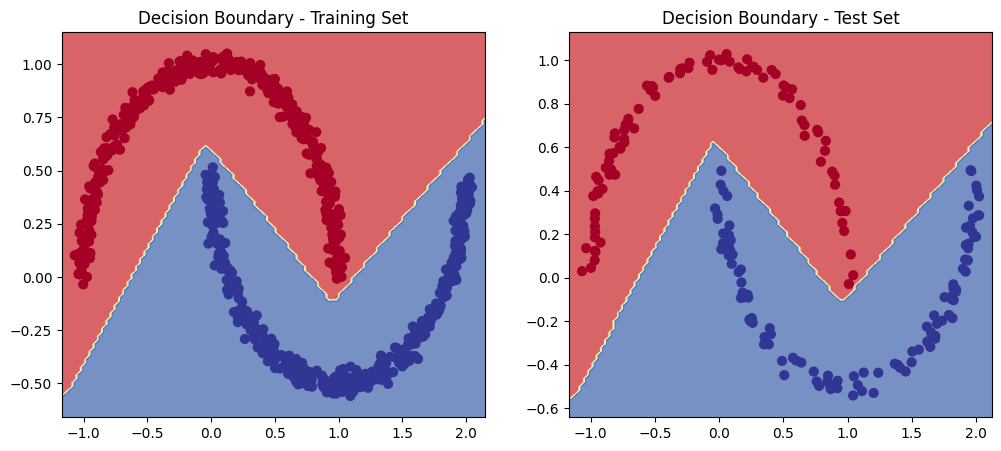

In [57]:
# Plot decision boundaries for training and test sets

plt.figure(figsize=(12, 5))

# Training data decision boundary
plt.subplot(1, 2, 1)
plt.title("Decision Boundary - Training Set")
plot_decision_boundary(model_0, X_train, y_train)

# Testing data decision boundary
plt.subplot(1, 2, 2)
plt.title("Decision Boundary - Test Set")
plot_decision_boundary(model_0, X_test, y_test)

plt.show()
